In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def z_score(x):
    return (x - np.mean(x)) / np.std(x)

In [3]:
X = np.load("kmnist-train-imgs.npz")['arr_0'].reshape(60000,784)
X = z_score(X)
Y = np.load("kmnist-train-labels.npz")['arr_0']

In [4]:
X_test = np.load("kmnist-test-imgs.npz")['arr_0'].reshape(10000,784)
X_test = z_score(X_test)
Y_test = np.load("kmnist-test-labels.npz")['arr_0']

In [5]:
classmap_df = pd.read_csv("kmnist_classmap.csv")
u = classmap_df['char']

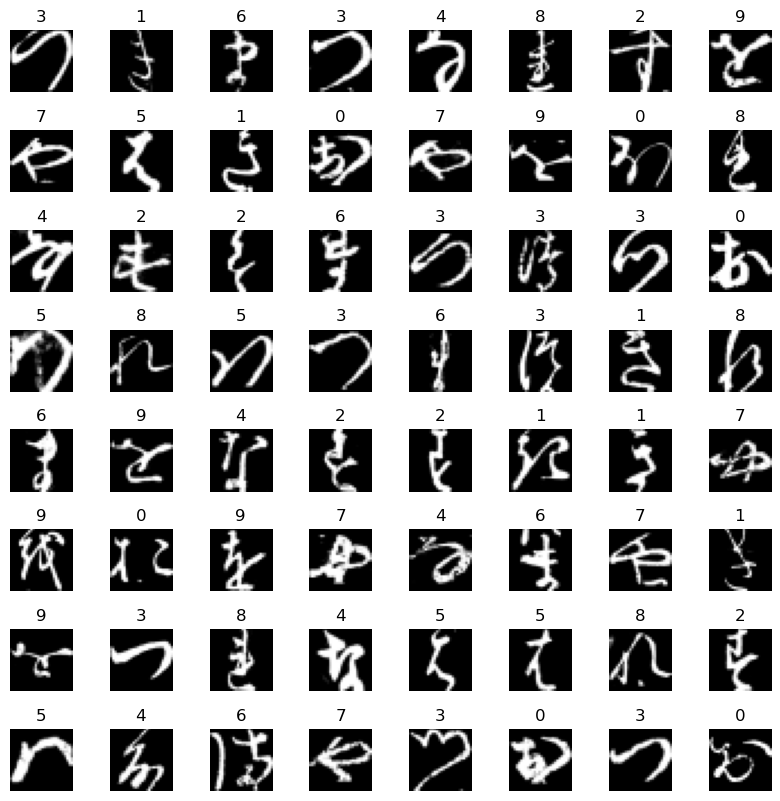

In [5]:
# Credit to Andrew Ng in his Coursera course
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y[random_index])
    ax.set_axis_off()

In [17]:
w1_init = np.random.randn(25, 784) * np.sqrt(2.0 / 784)
w2_init = np.random.randn(15, 25) * np.sqrt(2.0 / 25)
w3_init = np.random.randn(10, 15) * np.sqrt(2.0 / 15)
b1_init = np.zeros((25,))
b2_init = np.zeros((15,))
b3_init = np.zeros((10,))

In [7]:
def softmax(z):
    t = np.exp(z)
    s = np.sum(np.exp(z),axis=1)[:,np.newaxis]
    return t/s

In [8]:
def relu(z):
    return np.where(z > 0, z, 0)

In [9]:
def relu_deriv(z):
        return np.where(z > 0, 1, 0)

In [10]:
def forward_prop(X,w1,b1,w2,b2,w3,b3):
    z1 = np.matmul(X,w1.transpose()) + b1
    a1 = relu(z1)
    z2 = np.matmul(a1,w2.transpose()) + b2
    a2 = relu(z2)
    z3 = np.matmul(a2,w3.transpose()) + b3
    a3 = softmax(z3)
    return z1,a1,z2,a2,z3,a3

In [11]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1)) # same size as a3
    one_hot_y[np.arange(y.size), y] = 1 # For ith training example, the Y[i]th index is 1 and the others zero
    return one_hot_y

In [22]:
def gradients(X, Y, a3, a2, a1, z3, z2, z1, w2, w3, lambda_):
    d3 = a3 - one_hot(Y)                       
    d2 = np.matmul(d3, w3) * relu_deriv(z2)    # z2 feeds relu in forward prop
    d1 = np.matmul(d2, w2) * relu_deriv(z1)    # z1 feeds relu in forward prop
    dw1 = np.matmul(X.T, d1) / Y.size          
    db1 = np.sum(d1, axis=0) / Y.size          
    dw2 = np.matmul(a1.T, d2) / Y.size        
    db2 = np.sum(d2, axis=0) / Y.size         
    dw3 = np.matmul(a2.T, d3) / Y.size         
    db3 = np.sum(d3, axis=0) / Y.size  
    dw1 += lambda_ * w1_init.T
    dw2 += lambda_ * w2_init.T
    dw3 += lambda_ * w3_init.T
    return dw1, db1, dw2, db2, dw3, db3

In [13]:
def update_params(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,alpha):
    w1 = w1 - alpha * dw1.T
    b1 = b1 - alpha * db1.T
    w2 = w2 - alpha * dw2.T
    b2 = b2 - alpha * db2.T
    w3 = w3 - alpha * dw3.T
    b3 = b3 - alpha * db3
    return w1, b1, w2, b2, w3, b3

In [14]:
def gradient_descent(X,Y,w1_init, b1_init, w2_init, b2_init, w3_init, b3_init, alpha, lambda_, iters):
    w1, b1, w2, b2, w3, b3 = w1_init, b1_init, w2_init, b2_init, w3_init, b3_init
    for j in range(iters):
        z1, a1, z2, a2, z3, a3 = forward_prop(X,w1,b1,w2,b2,w3,b3)
        dw1, db1, dw2, db2, dw3, db3 = gradients(X,Y,a3,a2,a1,z3,z2,z1,w2,w3, lambda_)
        w1, b1, w2, b2, w3, b3 = update_params(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,alpha)
    return w1, b1, w2, b2, w3, b3

In [15]:
def prediction_func(x):
    z1, a1, z2, a2, z3, a3 = forward_prop(x,w1,b1,w2,b2,w3,b3)
    return np.argmax(a3, axis=1)

In [ ]:
w1,b1,w2,b2,w3,b3 = gradient_descent(X,Y,w1_init, b1_init, w2_init, b2_init, w3_init, b3_init, 0.001, 0.001, 5000)

In [66]:
# Accuracy
len(np.where(Y_test == prediction_func(X_test))[0]) / len(Y_test)

0.7814